In [36]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

# SMILES string
smiles = "[H][C@]1(n2cnc3c(N)ncnc32)O[C@H](COP(=O)(O)OP(=O)(O)OP(=O)(O)O)[C@@H](O)[C@H]1O"

# Convert the SMILES string to a RDKit molecule
mol = Chem.MolFromSmiles(smiles)

# Add hydrogens to the molecule
mol = Chem.AddHs(mol)

# Generate 3D coordinates
AllChem.EmbedMolecule(mol, AllChem.ETKDG())

0

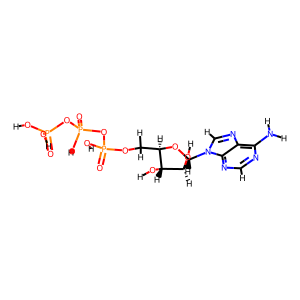

In [37]:
# Draw.MolToImage(mol).show()
# Draw.MolToFile(mol, 'molecule_2d.png')
Draw.MolToImage(mol)

In [38]:
import py3Dmol

view = py3Dmol.view(width=400, height=300)
mb = Chem.MolToMolBlock(mol)
view.addModel(mb, 'mol')
view.setStyle({'stick': {}})
view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [32]:
# 分子表示的转化
# 结构可视化
# 搜索
# 反应结果预测
# 分子性质的提取

In [4]:
png = view.screenshot(png=True)
if isinstance(png, bytes):
    with open("molecule_image.png", "wb") as file:
        file.write(png)
else:
    print("Did not receive image data. Received:", type(png))

Did not receive image data. Received: <class 'py3Dmol.view'>


In [5]:
from rdkit import Chem

def inchi_to_smiles(inchi):
    mol = Chem.MolFromInchi(inchi)
    if mol is not None:
        return Chem.MolToSmiles(mol)
    else:
        return "Invalid InChI"

# Example usage
inchi = "InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3"  # Replace this with your InChI
smiles = inchi_to_smiles(inchi)
print(smiles)


CCO


In [6]:
import requests

def inchikey_to_smiles(inchikey):
    """
    Retrieve the SMILES string for a given InChIKey using the PubChem API.

    Parameters:
    inchikey (str): The InChIKey to query.

    Returns:
    str: The corresponding SMILES string or None if not found.
    """
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/inchikey/{inchikey}/property/CanonicalSMILES/JSON"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return data['PropertyTable']['Properties'][0]['CanonicalSMILES']
    else:
        return None

# Example usage
inchikey = "OUYCCCASQSFEME-QMMMGPOBSA-N"  # Replace with your InChIKey
smiles = inchikey_to_smiles(inchikey)
if smiles:
    print("SMILES:", smiles)
else:
    print("SMILES not found for the given InChIKey")

SMILES: C1=CC(=CC=C1CC(C(=O)O)N)O
